In [3]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.6 MB/s 


In [4]:
import numpy as np
import pandas as pd
import os
from mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

In [1]:
# !unzip "/content/pic.zip" 

Archive:  /content/pic.zip
  inflating: pic/Aaron_Eckhart_0001.jpg  
  inflating: pic/Aaron_Guiel_0001.jpg  
  inflating: pic/Aaron_Patterson_0001.jpg  
  inflating: pic/Aaron_Peirsol_0001.jpg  
  inflating: pic/Aaron_Peirsol_0002.jpg  
  inflating: pic/Aaron_Peirsol_0003.jpg  
  inflating: pic/Aaron_Peirsol_0004.jpg  
  inflating: pic/Aaron_Pena_0001.jpg  
  inflating: pic/Aaron_Sorkin_0001.jpg  
  inflating: pic/Aaron_Sorkin_0002.jpg  
  inflating: pic/Aaron_Tippin_0001.jpg  
  inflating: pic/Abba_Eban_0001.jpg  
  inflating: pic/Abbas_Kiarostami_0001.jpg  
  inflating: pic/Abdel_Aziz_Al-Hakim_0001.jpg  
  inflating: pic/Abdel_Madi_Shabneh_0001.jpg  
  inflating: pic/Abdel_Nasser_Assidi_0001.jpg  
  inflating: pic/Abdel_Nasser_Assidi_0002.jpg  
  inflating: pic/Abdoulaye_Wade_0001.jpg  
  inflating: pic/Abdoulaye_Wade_0002.jpg  
  inflating: pic/Abdoulaye_Wade_0003.jpg  
  inflating: pic/Abdoulaye_Wade_0004.jpg  
  inflating: pic/Abdul_Majeed_Shobokshi_0001.jpg  
  inflating: pic/Abd

In [34]:
detector = MTCNN()
roi_gray = []
df = pd.DataFrame(columns=['image','pixels'])
i = 0
# g = []

directory = "/content/pic"
for filename in os.listdir(directory):

    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):      
        # g.append(cv2.imread(f,1))          
        gray = cv2.imread(f,1)                
        k = detector.detect_faces(gray)
        if len(k) != 0:
            n=k[0]['box']               
            # roi_gray.append(gray[n[1]:n[1]+n[3], n[0]:n[0]+n[2]])
            # cv2_imshow(gray[n[1]:n[1]+n[3], n[0]:n[0]+n[2]])
            # print(filename)
            p = gray[n[1]:n[1]+n[3], n[0]:n[0]+n[2]]
            p = cv2.resize(p, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
            df.loc[i] = pd.Series({'image':filename, 'pixels':p})            
        else:
            df.loc[i] = pd.Series({'image':filename, 'pixels':'none'})                        
        i += 1
        if i == 300:
            break

1/1 [==============================] - 0s 30ms/step


In [35]:
len(df['pixels'])

300

In [36]:
# df
p = df['pixels'][1]

In [32]:
# p = cv2.resize(p, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)

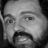

(48, 48, 3)

In [38]:
cv2_imshow(df['pixels'][100])
p.shape

In [ ]:
df2 = pd.read_csv('/content/legend.csv')
df2

In [ ]:
df3 = pd.merge(df, df2, on='image')
df3 = df3.drop("user.id", axis='columns')
df3 = df3.drop("image", axis='columns')
df3['emotion'] = df3['emotion'].str.lower()
df3 = df3[df3.pixels != 'none']
df3

In [ ]:
img = df3['pixels'][10]
cv2_imshow(img)